In [69]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from homework_util import RectDrawer, non_max_suppression_fast
import seaborn as sns
import numpy as np

## 1. Image Load 

([], <a list of 0 Text major ticklabel objects>)

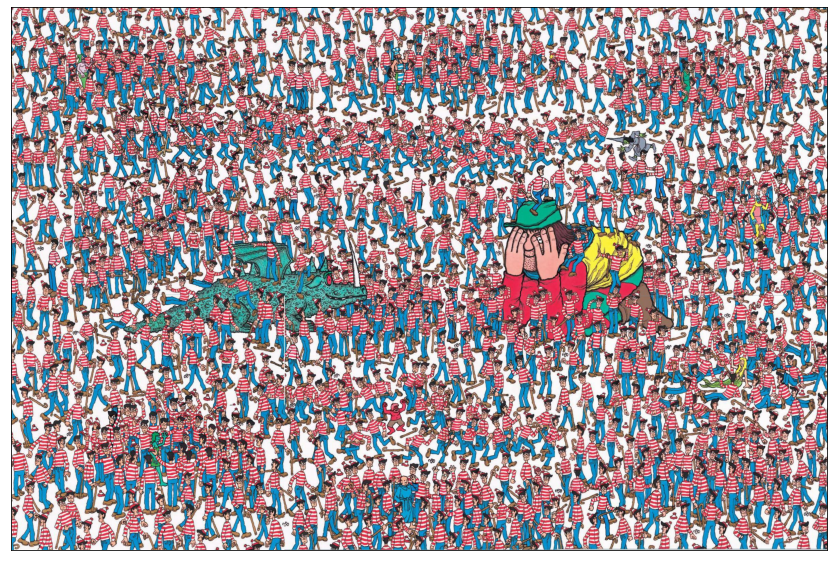

In [70]:
img = cv2.imread('How_many wally.jpg') # wally를 가져옵니다.
plt.figure(figsize=(20,10))
plt.imshow(img[:,:,::-1])
plt.grid(False)
plt.xticks([])
plt.yticks([])

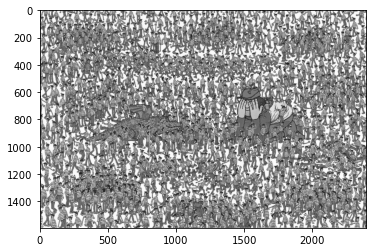

In [71]:
#흑백 이지미를 생성하고 호출합니다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

## 2. Get Template

In [72]:
drawer = RectDrawer(gray)
drawer.set_rect()
#rectangle을 그릴 수 있는 툴을 불러옵니다. 종료하려면 q를 누릅니다.
#너무 많이 하면 에러가 납니다.(CPU 문제 인듯 합니다)

Adding rect #1 with position[(1502, 454),(1594, 597)]
Adding rect #2 with position[(1959, 602),(2019, 765)]
Adding rect #3 with position[(2053, 673),(2114, 833)]
Adding rect #4 with position[(2131, 672),(2188, 840)]
Adding rect #5 with position[(1764, 982),(1830, 1126)]
Adding rect #6 with position[(1856, 1100),(1916, 1265)]
Adding rect #7 with position[(1833, 509),(1908, 683)]
Adding rect #8 with position[(1940, 363),(2000, 496)]
Adding rect #9 with position[(736, 821),(784, 1025)]
Adding rect #10 with position[(93, 527),(140, 677)]
Adding rect #11 with position[(651, 524),(693, 705)]
Adding rect #12 with position[(848, 567),(887, 718)]
Adding rect #13 with position[(1004, 612),(1047, 761)]
Adding rect #14 with position[(1065, 557),(1114, 711)]
Adding rect #15 with position[(1198, 357),(1296, 471)]
Adding rect #16 with position[(1146, 471),(1232, 614)]
Adding rect #17 with position[(1723, 404),(1802, 518)]
Adding rect #18 with position[(2002, 503),(2058, 685)]
Adding rect #19 with pos

In [73]:
templates = drawer.get_template()          #return template image
temp_rects = np.array(drawer.get_rect())   #return template coordinate(x, y, w, h)

In [74]:
temp_w, temp_h = temp_rects.mean(axis=0).astype('int')[2:]
temp_w, temp_h   # average template width, height

(61, 157)

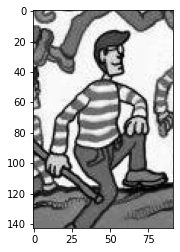

In [75]:
plt.imshow(templates[0], cmap='gray')
#샘플 하나 뽑아봄.

## 3. Template Matching

In [76]:
## To do: template matching
#생성한 Rectangle 수 많큼 반복합니다.
for i in range(21):
    result = cv2.matchTemplate(gray, templates[i], cv2.TM_CCOEFF_NORMED) # max_loc 사용
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(max_val, max_loc)

0.9999995827674866 (1502, 454)
0.9999997615814209 (1959, 602)
0.9999998211860657 (2053, 673)
0.9999998807907104 (2131, 672)
0.9999996423721313 (1764, 982)
1.0 (1856, 1100)
1.0 (1833, 509)
1.0 (1940, 363)
1.0 (736, 821)
1.0 (93, 527)
0.9999994039535522 (651, 524)
0.9999995827674866 (848, 567)
1.0 (1004, 612)
0.9999988079071045 (1065, 557)
0.9999998807907104 (1198, 357)
0.9999987483024597 (1146, 471)
0.9999997615814209 (1723, 404)
1.0 (2002, 503)
1.0 (1980, 859)
1.0 (2098, 1325)
0.9999993443489075 (2010, 1407)


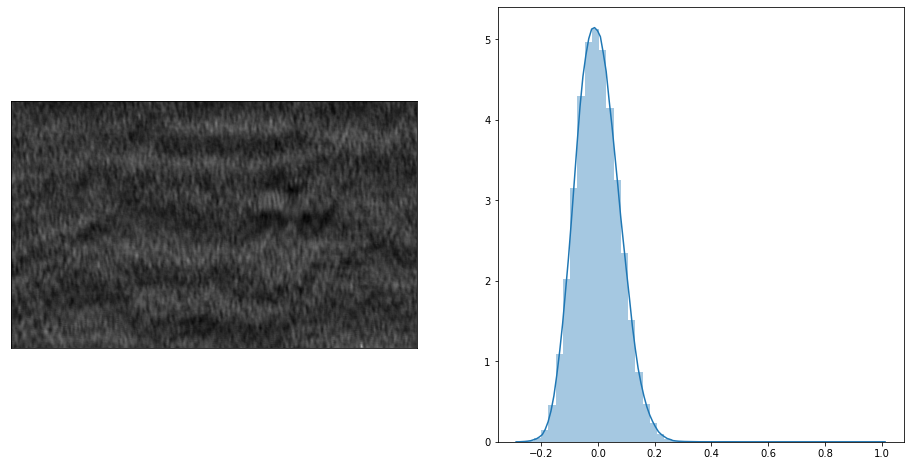

In [77]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(result, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
sns.distplot(result.reshape(-1))

## 4. Binarization, Thresholding

In [78]:
# To do: use cv2.threshold
#for i in range(3):
ret, binary = cv2.threshold(result,0.2, 1, cv2.THRESH_BINARY)

In [79]:
# thresholds = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]

# #cv2.THRESH_BINARY: 픽셀 값이 threshold_value보다 크면 value, 작으면 0으로 할당
# #cv2.THRESH_BINARY_INV: 픽셀 값이 threshold_value보다 크면 0, 작으면 value로 할당
# #cv2.THRESH_TRUNC: 픽셀 값이 threshold_value보다 크면 threshold_value, 작으면 픽셀 값 그대로 할당
# #cv2.THRESH_TOERO: 픽셀 값이 threshold_value보다 크면 픽셀 값 그대로, 작으면 0으로 할당
# #cv2.THRESH_TOZERO_INV: 픽셀 값이 threshold_value보다 크면 0, 작으면 픽셀 값 할당

# for threshold in thresholds:
#         binary = cv2.threshold(img, 127, 255 ,method)
# #         min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# #         # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
# #         if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
# #             top_left = min_loc
# #         else:
# #             top_left = max_loc
# #             bottom_right = (top_left[0] + temp_w, top_left[1] + temp_h)

([], <a list of 0 Text major ticklabel objects>)

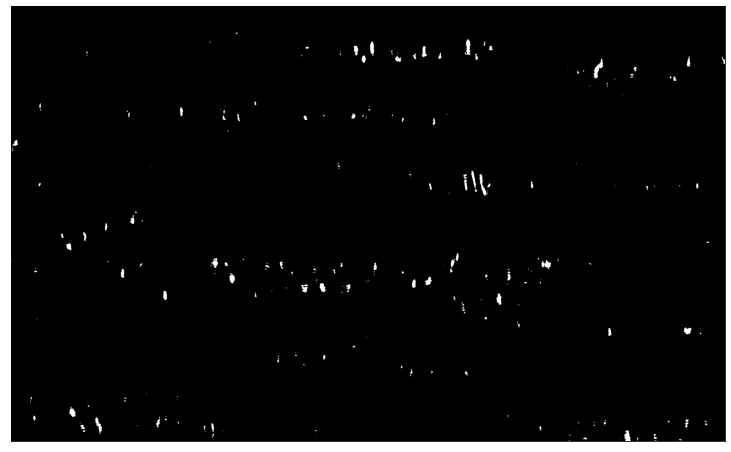

In [80]:
binary = binary.astype('uint8')
plt.figure(figsize=(16,8))
plt.imshow(binary, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

## 5. Find contour

In [81]:
## To do : use cv2.findContours
contour, hierachy= cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [82]:
print(len(contour))
contour[10]

92


array([[[ 665, 1221]]], dtype=int32)

In [83]:
x=[]
y=[]
for c in contour:
    x.append(c.min(axis=0)[0][0]) 
    y.append(c.min(axis=0)[0][1]) 
x = np.array(x)
y = np.array(y)

In [84]:
rects = np.array([x, y, np.zeros(len(x)) + temp_w, np.zeros(len(x)) + temp_h]).T
print(rects.shape)
rects[:10]

(92, 4)


array([[   0.,    0.,   61.,  157.],
       [1274., 1578.,   61.,  157.],
       [1908., 1522.,   61.,  157.],
       [ 273., 1502.,   61.,  157.],
       [1262., 1495.,   61.,  157.],
       [1796., 1492.,   61.,  157.],
       [ 643., 1484.,   61.,  157.],
       [ 368., 1455.,   61.,  157.],
       [ 299., 1239.,   61.,  157.],
       [ 586., 1226.,   61.,  157.]])

## 6. Non-Maximum Suppression

In [85]:
## To do : use non_max_suppression_fast
numShowRects = 92
bboxes, probs = non_max_suppression_fast(rects, np.random.normal(0.7, 0.5, (numShowRects,)))
print(len(bboxes))
print(len(probs))

50
50


([], <a list of 0 Text major ticklabel objects>)

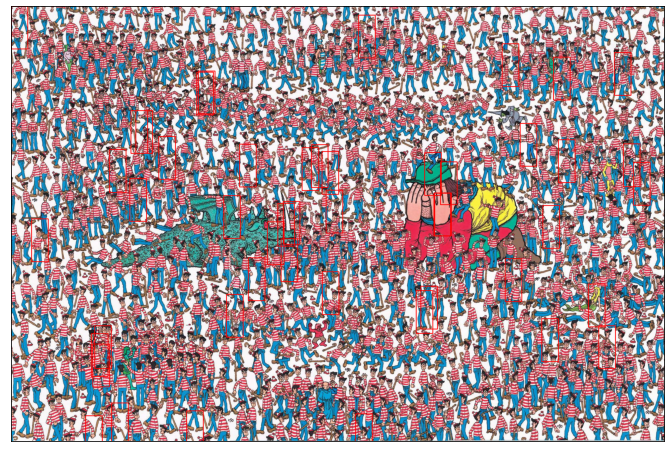

In [86]:
draw = img.copy()

for bbox in bboxes  :
    x,y,w,h = bbox
    cv2.rectangle(draw, (x,y), (x+w, y+h), (0,0,255), 2)
    
plt.figure(figsize=(16,8))
plt.imshow(draw[:,:,::-1])
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

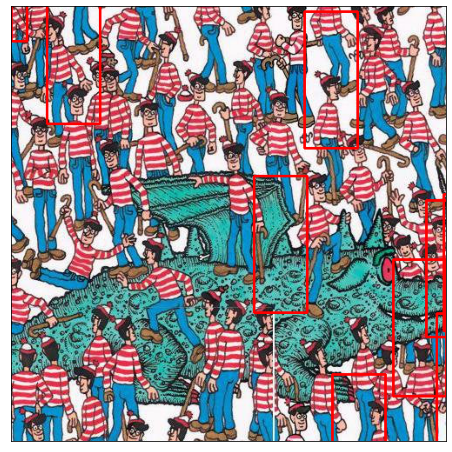

In [87]:
plt.figure(figsize=(16,8))
plt.imshow(draw[500:1000,500:1000,::-1])
plt.grid(False)
plt.xticks([])
plt.yticks([])